# BA886 - Capstone 2021
# Sample Python Code for Downloading Yahoo! Finance Data for U.S. Stocks
- Professor Peter Wysocki
- Perpetual Investors Projects
- February 2021





**Description:**
- The following code cells contain example code that uses the *yfinance* package to download stock market data for U.S. Companies
- Please see the short video posted on the BA886 site on QuestromTools (under Media Gallery) that gives an explanation of this code
- You may run this "ipynb" on Google Colab
or in Jupyter Notebooks

**Important: Documentation on the "yfinance" package can be found here:**

- https://aroussi.com/post/python-yahoo-finance

- https://pypi.org/project/yfinance/

- https://www.datasciencelearner.com/yahoo-finance-api-python/


In [3]:
# Install yfinance package using pip (use pip3 for installing a package for Python3)
!pip install yfinance

In [65]:
# We will use the following packages: "pandas" (for dataframes) and yfinance (to get data)
# So import these packages (reference as "pd" and "yf" for the code).
import pandas as pd
import yfinance as yf
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
my_string= '''AEE
AEP
AES
APA
ATO
AWK
BKR
CMS
CNP
COG
COP
CVX
D
DTE
DUK
DVN
ED
EIX
EOG
ES
ETR
EVRG
EXC
FANG
FE
FTI
HAL
HES
HFC
KMI
LNT
MPC
MRO
NEE
NI
NOV
NRG
OKE
OXY
PEG
PNW
PPL
PSX
PXD
SLB
SO
SRE
VLO
WEC
WMB
XEL
XOM'''

ticker_list = my_string.split('\n')


tickers_to_run = ''

for ticker in ticker_list:
    tickers_to_run += ticker + " "

df_yahoo = yf.download(tickers_to_run, period="10y", interval="1mo", group_by = 'ticker')
for ticker in ticker_list:
    td = df_yahoo[ticker]
    td['Ticker'] = ticker
    df_all = df_all.append(td)


[*********************100%***********************]  52 of 52 completed


In [6]:
tickers_to_run

'AEE AEP AES APA ATO AWK BKR CMS CNP COG COP CVX D DTE DUK DVN ED EIX EOG ES ETR EVRG EXC FANG FE FTI HAL HES HFC KMI LNT MPC MRO NEE NI NOV NRG OKE OXY PEG PNW PPL PSX PXD SLB SO SRE VLO WEC WMB XEL XOM '

In [4]:
df_yahoo.to_csv('C:/Users/YEET/Documents/BU/Classes/Capstone/alltickers_yfinance.csv')

In [5]:
# List the first 5 rows of the dataframe

df_yahoo.head()

AES                                                 PEG  \
            Adj Close  Close   High    Low   Open       Volume       Open   
Date                                                                        
2011-03-01  10.026628  13.00  13.40  12.09  12.41  124019400.0  32.590000   
2011-03-23        NaN    NaN    NaN    NaN    NaN          NaN        NaN   
2011-04-01  10.211733  13.24  13.50  12.42  13.06  113398400.0  31.709999   
2011-05-01   9.995773  12.96  13.42  12.30  13.30  143400400.0  32.189999   
2011-06-01   9.826095  12.74  13.00  12.03  12.93  131170600.0  33.340000   

                                             ...        HAL             \
                 High        Low      Close  ...       High        Low   
Date                                         ...                         
2011-03-01  32.730000  30.150000  31.510000  ...  50.470001  42.500000   
2011-03-23        NaN        NaN        NaN  ...        NaN        NaN   
2011-04-01  32.230000  30.299999  32.169998  ...  51.450001  44.599998   
2011-05-01  34.220001  31.670000  33.500000  ...  51.180000  44.470001   
2011-06-01  33.520000  31.070000  32.639999  ...  51.389999  45.189999   

                                          ATO                        \
                 Open       Volume       Open       High        Low   
Date                                                                  
2011-03-01  47.509998  276332300.0  33.959999  35.250000  32.240002   
2011-03-23        NaN          NaN        NaN        NaN        NaN   
2011-04-01  50.220001  249231100.0  34.279999  34.939999  32.759998   
2011-05-01  50.750000  236404100.0  35.009998  35.080002  32.639999   
2011-06-01  49.880001  260866100.0  33.369999  33.430000  31.230000   

                                              
                Close  Adj Close      Volume  
Date                                          
2011-03-01  34.099998  25.877058   8885500.0  
2011-03-23        NaN        NaN         NaN  
2011-04-01  34.889999  26.476553   4697800.0  
2011-05-01  33.349998  25.307915   7815700.0  
2011-06-01  33.250000  25.488194  11587000.0  

[5 rows x 312 columns]

In [20]:
df_all = pd.DataFrame()

for ticker in ticker_list:
    td = df_yahoo[ticker]
    td['Ticker'] = ticker
    df_all = df_all.append(td)

In [18]:
x = df_yahoo[ticker]
x['Ticker'] = ticker
df_all = df_all.append(x)

In [25]:
df_all.shape

(9100, 7)

In [24]:
df_all.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Ticker        object
dtype: object

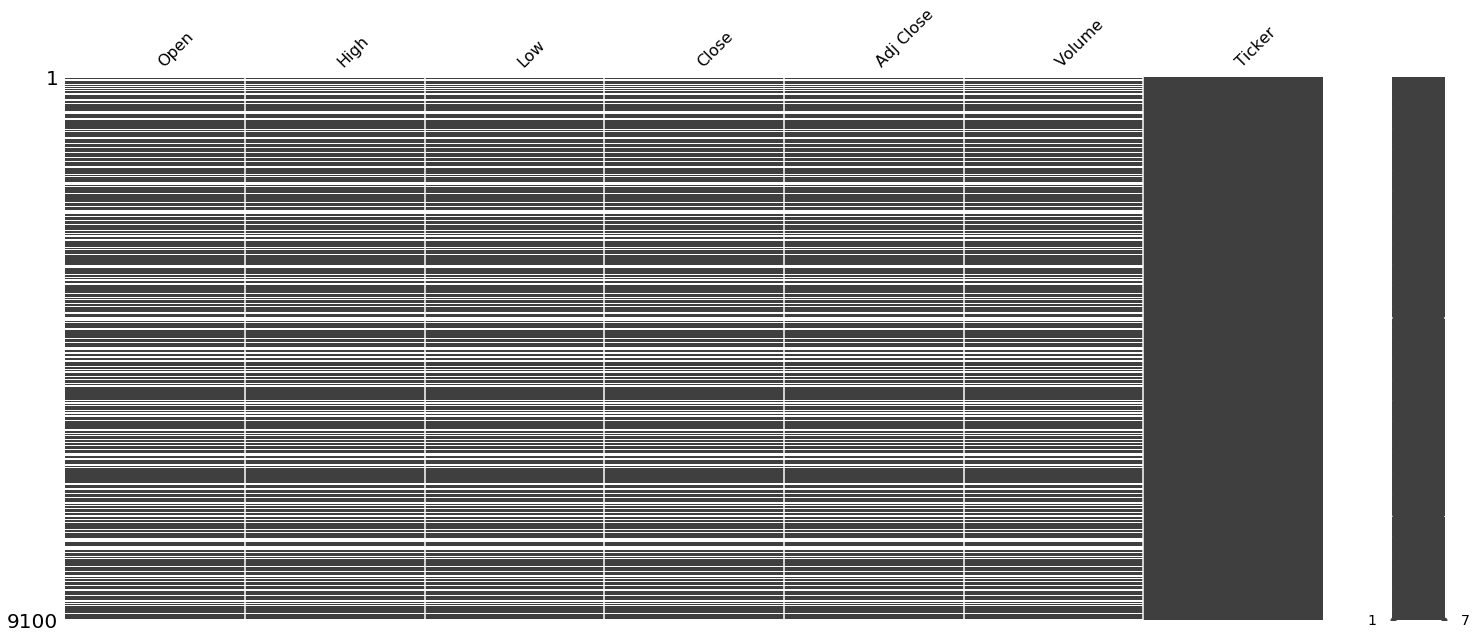

In [28]:
msno.matrix(df_all) 

In [70]:
df_all.isna().sum()

Open         2846
High         2846
Low          2846
Close        2846
Adj Close    2846
Volume       2846
Ticker          0
dtype: int64

In [34]:
df_all.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2011-03-01,27.980000,28.469999,26.459999,28.070000,19.233957,46899200.0,AEE
2011-03-23,NaN,NaN,NaN,NaN,NaN,NaN,AEE
2011-04-01,28.160000,29.350000,27.900000,29.309999,20.364746,27672200.0,AEE
2011-05-01,29.389999,30.139999,28.690001,29.709999,20.642670,38584300.0,AEE
2011-06-01,29.690001,29.740000,27.780001,28.840000,20.038185,37433000.0,AEE


In [41]:
df_all.index

DatetimeIndex(['2011-03-01', '2011-03-23', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-06-17', '2011-07-01', '2011-08-01',
               '2011-08-11', '2011-08-24',
               ...
               '2020-08-01', '2020-08-14', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-11-20', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-02-12'],
              dtype='datetime64[ns]', name='Date', length=9100, freq=None)

In [57]:
df_all.groupby(df_all.index.year)['Close'].mean()

Date
2011    44.214443
2012    44.645258
2013    50.990554
2014    58.675118
2015    53.060800
2016    54.696427
2017    58.656887
2018    61.917853
2019    63.131847
2020    52.502781
2021    55.408718
Name: Close, dtype: float64

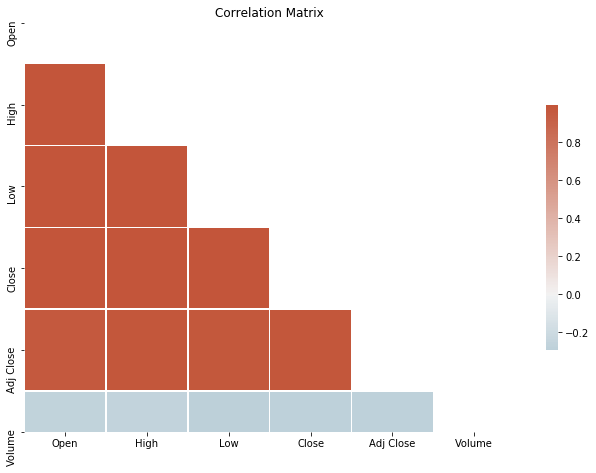

In [68]:
corr  = df_all.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [23]:
# If we just wish to list the data for the stock ticker AAPL, we would do:

dd = df_yahoo['WEC']

In [24]:
tickname='WEC'
dd['Ticker'] = tickname
dd

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2011-03-01,29.750000,31.010000,28.860001,30.500000,22.006083,34557500.0,WEC
2011-03-23,NaN,NaN,NaN,NaN,NaN,NaN,WEC
2011-04-01,30.650000,31.240000,29.389999,31.209999,22.518351,18968000.0,WEC
2011-05-01,31.280001,31.889999,30.820000,31.270000,22.561649,26064800.0,WEC
2011-06-01,31.260000,31.520000,30.469999,31.350000,22.806835,27801700.0,WEC
...,...,...,...,...,...,...,...
2020-11-20,NaN,NaN,NaN,NaN,NaN,NaN,WEC
2020-12-01,95.739998,96.550003,88.269997,92.029999,91.303535,25163700.0,WEC
2021-01-01,92.099998,93.050003,84.440002,88.900002,88.198242,26516800.0,WEC


In [17]:
name_CSV_file = tickname + '_yfinance.csv'

dd.to_csv(name_CSV_file)

In [ ]:
df